In [81]:
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.max_columns = 200
businessfile = 'logins.json'
businessfile1 = 'ultimate_data_challenge.json'

### Part 1 ‑Exploratory data analysis

In [82]:
value = []
with open(businessfile) as f:
    data = json.load(f)

logins = pd.DataFrame()
logins['login_time'] = data['login_time']
logins.set_index('login_time', inplace = True)
logins['count'] = 1
logins.index = pd.to_datetime(logins.index)
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [83]:
logins.describe()

,count
count,93142.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [84]:
logins = logins.resample('15T').sum()
# Impute missing values with the next valid observation
logins = logins.fillna(method='bfill')
login_hour = logins.resample('W').sum()
# Print out the number of missing values
print(logins.isnull().sum())
logins.head()

count    0
dtype: int64


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5,0,'Hour Number')

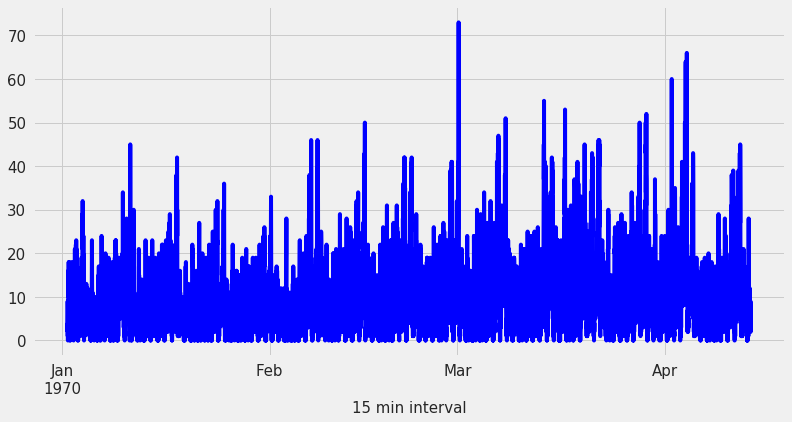

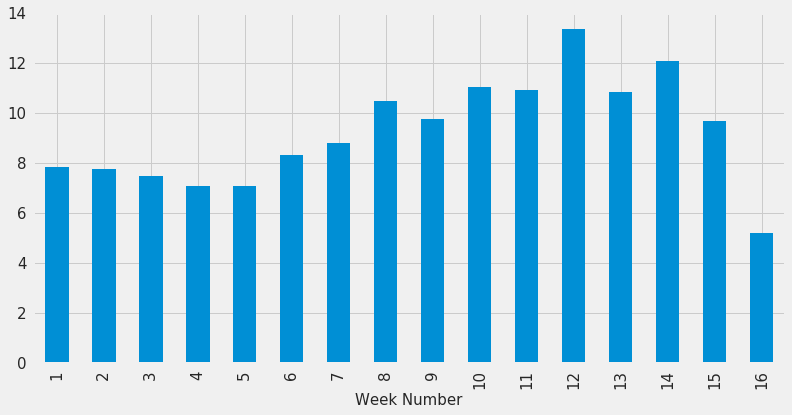

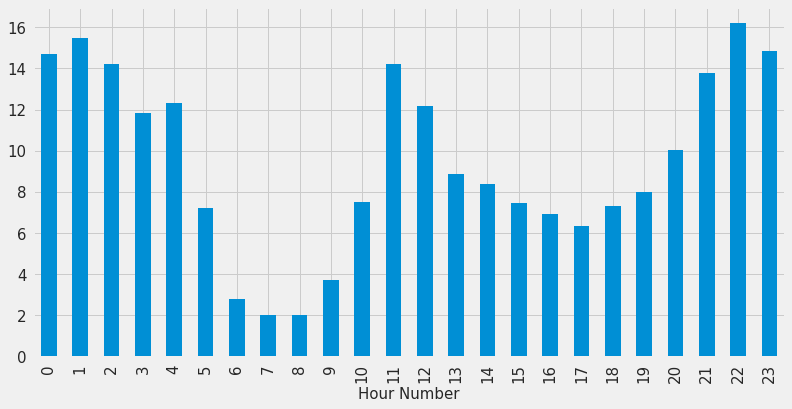

In [85]:
logins.plot(color='blue', fontsize=15, figsize=(12, 6), legend = False)
plt.xlabel('15 min interval', fontsize = 15)
index_month = logins.index.week

mean_logins_by_month = logins.groupby(index_month).mean()
mean_logins_by_month.plot.bar(fontsize=15, figsize=(12, 6), legend = False)
plt.xlabel('Week Number', fontsize = 15)

index_month = logins.index.hour

mean_logins_by_hour = logins.groupby(index_month).mean()
mean_logins_by_hour.plot.bar(fontsize=15, figsize=(12, 6), legend = False)
plt.xlabel('Hour Number', fontsize = 15)

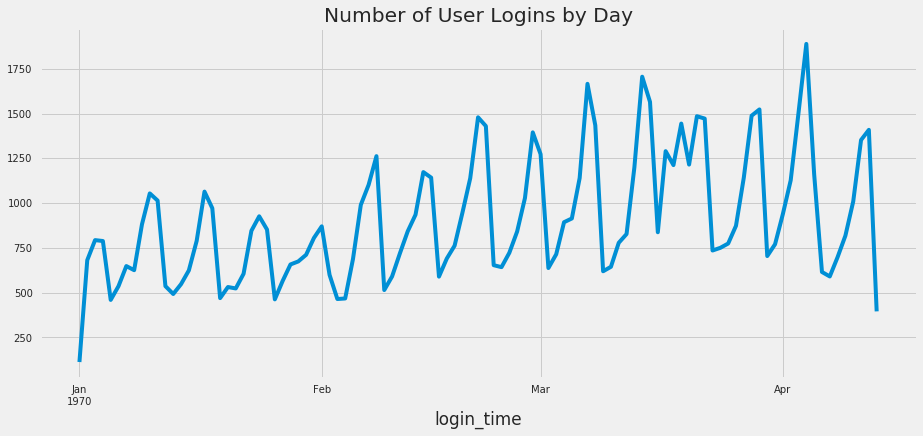

In [128]:
daily_logins = logins.resample('1D').sum()
daily_logins.plot(legend=False)
plt.title("Number of User Logins by Day")
plt.show()

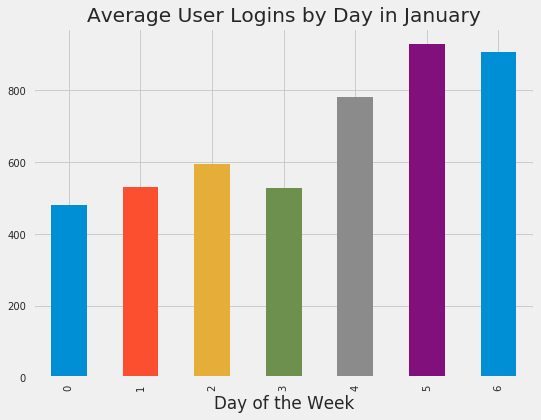

In [86]:
daily_logins = logins['1970-01-01':'1970-01-31'].resample('1D').sum()
daily_logins['dayofweek'] = daily_logins.index.dayofweek
labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
daily_logins.groupby('dayofweek')['count'].mean().plot(kind='bar', legend=False, figsize = (8,6))
plt.title('Average User Logins by Day in January')
plt.xlabel('Day of the Week')
plt.show()

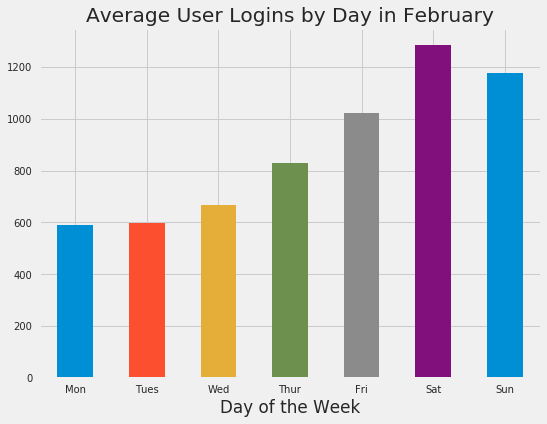

In [87]:
daily_logins = logins['1970-02-01':'1970-02-28'].resample('1D').sum()
daily_logins['dayofweek'] = daily_logins.index.dayofweek
labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
ax = daily_logins.groupby('dayofweek')['count'].mean().plot(kind='bar', legend=False, figsize = (8,6))
ax.set_xticklabels(labels, rotation=0)
plt.title('Average User Logins by Day in February')
plt.xlabel('Day of the Week')
plt.show()

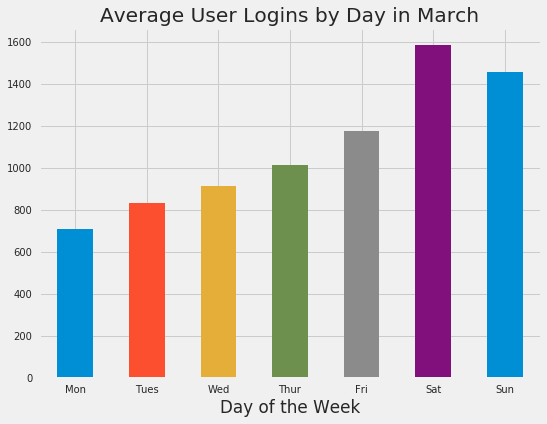

In [88]:
daily_logins = logins['1970-03-01':'1970-03-31'].resample('1D').sum()
daily_logins['dayofweek'] = daily_logins.index.dayofweek
labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
ax = daily_logins.groupby('dayofweek')['count'].mean().plot(kind='bar', legend=False, figsize = (8,6))
ax.set_xticklabels(labels, rotation=0)
plt.title('Average User Logins by Day in March')
plt.xlabel('Day of the Week')
plt.show()

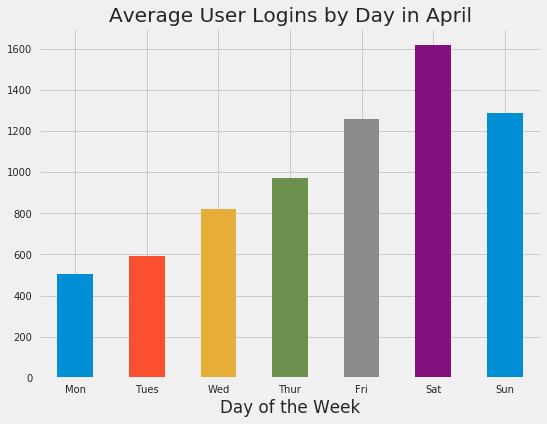

In [89]:
daily_logins = logins['1970-04-01':'1970-04-13'].resample('1D').sum()
daily_logins['dayofweek'] = daily_logins.index.dayofweek
labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
ax = daily_logins.groupby('dayofweek')['count'].mean().plot(kind='bar', legend=False, figsize = (8,6))
ax.set_xticklabels(labels, rotation=0)
plt.title('Average User Logins by Day in April')
plt.xlabel('Day of the Week')
plt.show()

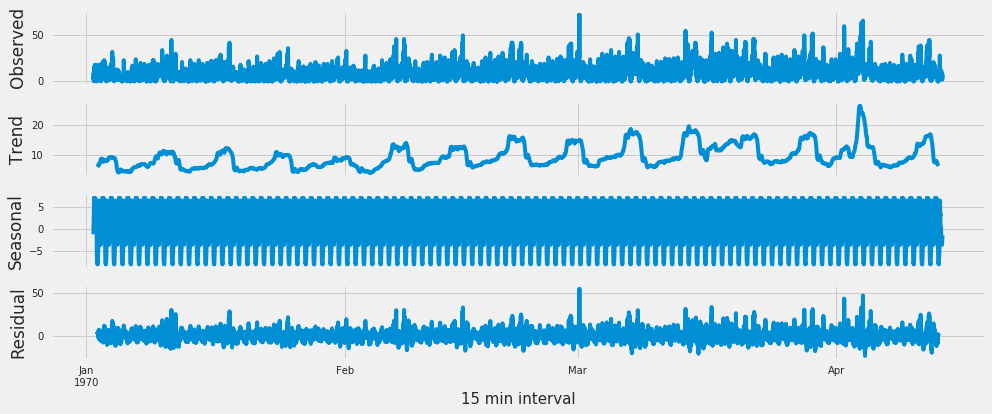

In [125]:
decompfreq = 24*4
s = seasonal_decompose(logins.iloc[:,0],freq=decompfreq,  model='additive') #
#residual = s.resid
#seasonal = s.seasonal 
#trend = s.trend
#print (trend)
s.plot()
plt.xlabel('15 min interval',fontsize =15)
plt.show()

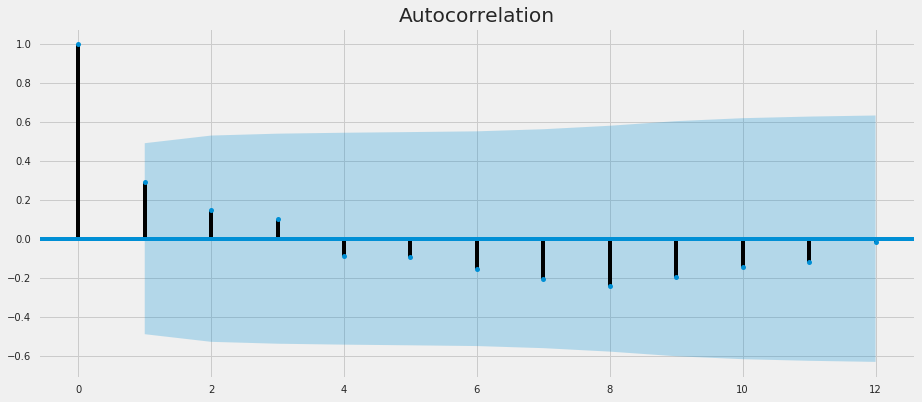

/home/titli/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


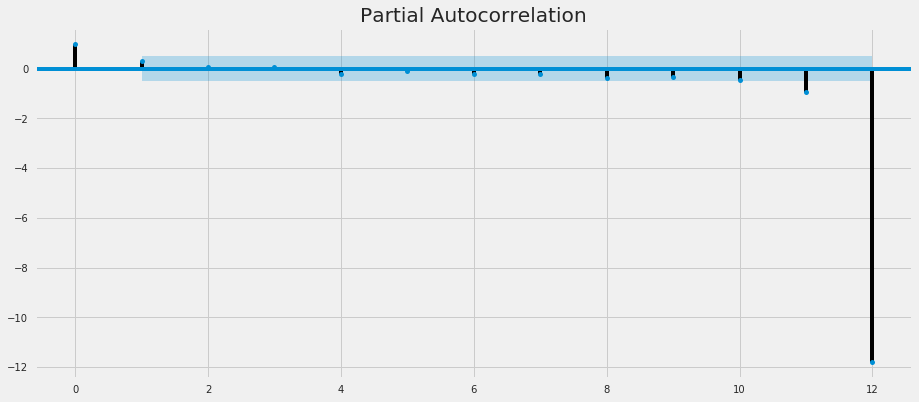

In [129]:
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(login_hour['count'], lags= 12)

# Show plot
plt.show()
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_pacf(login_hour['count'], lags =12)

# Show plot
plt.show()

### Part 1 ‑Exploratory data analysis

**Weekly Variation across All 16 Weeks**
The scatterplot of daily user logins by day of the week across all 16 weeks shows a few outliers. First, the user logins on Thursday in week 1 is unusally low becasue the data is only available after 8pm on January 1, 1970. Similarly, the last day included in the dataset is Monday in week 16, April 13, 1970, and there is no data available after 7pm. The user logins in week 12 are the highest from Monday to Thursday, which are March 16-19, which might corrospnd to holidays. The user logins in week 14 are the highest on Friday and Saturday, April 3-4.

**Weekly variation across**
Ususally the user activity is highest on Saturday followed by Sunday and Friday. The weekend logins rae highest in March and April. In Jauary there is significantly more logins on Wednesday.

**Hourly Variation**
Users are most active in the evening from 8pm to 5am and around noon time from 11am to 2pm. There are very few active users in the morning between 6am and 10am.

**Time series variation** 
The timeseries decomposition with frequncy of shows no seasonal variation with an upward moving trend. The autocorrelation and the partial autocorrelation on a hourly time series with lag of 12 hrs shows that the data is not very well correlated or statistically significant. Any data above the blue zone is significant.

### Part 2 - Experiment and Metrics Design

Gotham and Metropolis are two neighboring cities that have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**A** When Gotham is active at night, there might not be enough drivers to meet the total demand because drivers in Metropolis are not willing to cross the bridge and incur the toll costs and vice versa. Reimbursing toll costs should encourage more drivers to give rides in whichever city that is most active at the time. The revenue gained from the additional driver activities in Gotham on any weekday night and that in Metropolis on any weekday day time minus the total reimbursement cost during a specific period. If the revenue minus cost is greater than zero, the experiment is succssful.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

**A**: The experiment should include a control group and a treatment group. Some riders and drivers should be randomly selected for control and treatment group for a given period of time. The drivers in the *treatment group*  will be reimbursed for all the toll costs whereas the drivers in the *control group* will not be reimbursed for the toll costs. 
Randomization is important to and the sample size should be sufficiently large the two groups would become independent so that the distribution of personal characteristics, such as race, gender and years of education, would be statistically identical for the two groups. This will help to identify the attribute that is defining differnce in driver behaviours. 

To test whether the experiment is successful in influencing driver activities, we can first check whether the total driver activities are higher in the treatment group than in the control group by using a two-sample t-test. If the additional revenue gained from increased activities in the treatment group is significantly greater the total reimbursement cost then the experiment is successful. The revenue also need to be monitored for day and night variations. If the revenue is greater during day then the toll should be removed for the day time only.

### Part-3 ‑Predictive modeling

In [92]:
def parse_json(data):
    """ function to parse json data """
    city = []
    phone = []
    signup_date = []
    last_trip_date = []
    avg_dist = []
    avg_rating_by_driver = []
    avg_rating_of_driver = []
    surge_pct = []
    avg_surge = []
    trips_in_first_30_days = []
    ultimate_black_user = []
    weekday_pct = []
    
    
    # parse each item
    for item in data:
        city.append(item['city'])
        phone.append(item['phone'])
        signup_date.append(item['signup_date'])
        last_trip_date.append(item['last_trip_date'])
        avg_dist.append(item['avg_dist'])
        avg_rating_by_driver.append(item['avg_rating_by_driver'])
        avg_rating_of_driver.append(item['avg_rating_of_driver'])
        surge_pct.append(item['surge_pct'])
        avg_surge.append(item['avg_surge'])
        trips_in_first_30_days.append(item['trips_in_first_30_days'])
        ultimate_black_user.append(item['ultimate_black_user'])
        weekday_pct.append(item['weekday_pct'])
        
    
    # create DataFrame
    maps = {'city': city, 'phone': phone, 'signup_date': signup_date, 
            'last_trip_date': last_trip_date, 'avg_dist': avg_dist, 'avg_rating_by_driver': avg_rating_by_driver,
           'avg_rating_of_driver': avg_rating_of_driver, 'surge_pct': surge_pct,
           'avg_surge':avg_surge, 'trips_in_first_30_days': trips_in_first_30_days,
           'ultimate_black_user': ultimate_black_user, 'weekday_pct': weekday_pct }
    columns=['city', 'phone', 'signup_date', 'last_trip_date', 'avg_dist', 'avg_rating_by_driver',
           'avg_rating_of_driver', 'surge_pct', 'avg_surge', 'trips_in_first_30_days',
           'ultimate_black_user', 'weekday_pct' ]
    
    return pd.DataFrame(maps, columns=columns)

In [93]:
with open(businessfile1, 'r') as f:
    json_data = json.load(f)

data_challenge = parse_json(json_data)
data_challenge.head()

,city,phone,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,King's Landing,iPhone,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,True,46.2
1,Astapor,Android,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,False,50.0
2,Astapor,iPhone,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,False,100.0
3,King's Landing,iPhone,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,True,80.0
4,Winterfell,Android,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,False,82.4


In [94]:
#Null values
data_challenge.isnull().sum()

city                         0
phone                      396
signup_date                  0
last_trip_date               0
avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
surge_pct                    0
avg_surge                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [95]:
data_challenge = data_challenge.fillna(method='ffill')
data_challenge.isnull().sum()

city                      0
phone                     0
signup_date               0
last_trip_date            0
avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
surge_pct                 0
avg_surge                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64

In [96]:
data_challenge['ultimate_black_user'] = data_challenge['ultimate_black_user'].astype(int)
data_challenge.city.iloc[data_challenge[data_challenge['city'] == "King's Landing"].index] =1
data_challenge.city.iloc[data_challenge[data_challenge['city'] == "Astapor"].index] = 2
data_challenge.city.iloc[data_challenge[data_challenge['city'] == "Winterfell"].index] = 3


/home/titli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [97]:
data_challenge.head()

,city,phone,signup_date,last_trip_date,avg_dist,avg_rating_by_driver,avg_rating_of_driver,surge_pct,avg_surge,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,1,iPhone,2014-01-25,2014-06-17,3.67,5.0,4.7,15.4,1.10,4,1,46.2
1,2,Android,2014-01-29,2014-05-05,8.26,5.0,5.0,0.0,1.00,0,0,50.0
2,2,iPhone,2014-01-06,2014-01-07,0.77,5.0,4.3,0.0,1.00,3,0,100.0
3,1,iPhone,2014-01-10,2014-06-29,2.36,4.9,4.6,20.0,1.14,9,1,80.0
4,3,Android,2014-01-27,2014-03-15,3.13,4.9,4.4,11.8,1.19,14,0,82.4


In [98]:
data_challenge['signup_date'] = pd.to_datetime(data_challenge['signup_date'])
data_challenge['last_trip_date'] = pd.to_datetime(data_challenge['last_trip_date'])

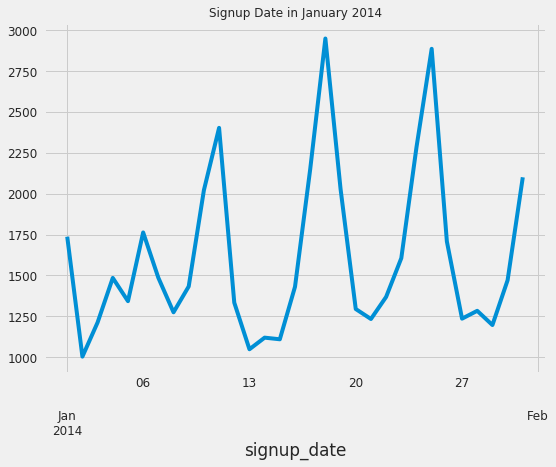

In [99]:
data_challenge.groupby('signup_date').size().plot(figsize=(8,6), fontsize = 12)
plt.title('Signup Date in January 2014', fontsize = 12)
plt.show()

Figure 3.1

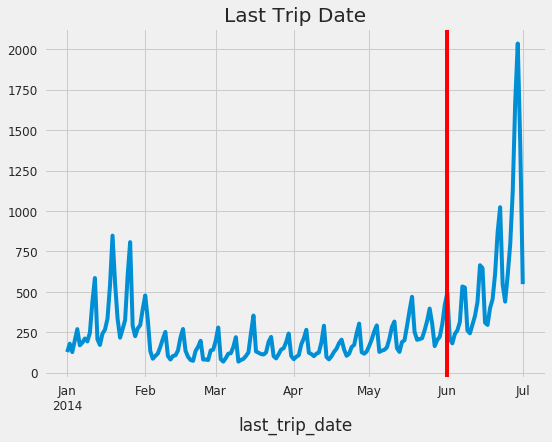

In [100]:
data_challenge.groupby('last_trip_date').size().plot(figsize=(8,6), fontsize = 12)
plt.axvline(x='2014-06-01', color='red')
plt.title('Last Trip Date')
plt.show()



Figure 3.2

### User Retention: A user is retained if the date of the last trip is on or after June 1, 2014 (which is within 30 days preceding July 1, 2014).

In [101]:
data_challenge['retain'] = (data_challenge.last_trip_date >= '2014-06-01').astype(int)
data_challenge['retain'].head()

0    1
1    0
2    0
3    1
4    0
Name: retain, dtype: int64

#### Price calculation based on Uber https://www.uber.com/en-CA/drive/partner-app/how-surge-works/

In [102]:
data_challenge ['monetary'] = data_challenge['avg_dist']* data_challenge['trips_in_first_30_days']* \
data_challenge['avg_surge']
data_challenge ['monetary'].head()

0    16.1480
1     0.0000
2     2.3100
3    24.2136
4    52.1458
Name: monetary, dtype: float64

In [103]:
dataset1 = data_challenge[data_challenge['retain'] == 1]
dataset0 = data_challenge[data_challenge['retain'] == 0]

In [104]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])


In [105]:
def bar_plot_compare_retention(x,y,bins,xlabel,figname):
    """ This function creates bar chart to compare different parameters
    
    """
    sns.set(rc={"figure.figsize": (14, 6)})
    sns.set_style("white")
    sns.despine()
    ax1 = sns.distplot(x, bins=bins, 
                   kde=True, hist_kws=dict(edgecolor='k', lw=0.5, alpha=0.5), color = tableau20[2], kde_kws={'linewidth': 4})
    ax2 = sns.distplot(y, bins=bins, 
                   color='Blue', kde=True, hist_kws=dict(edgecolor='k', lw=0.5, alpha=0.3), kde_kws={'linewidth': 4})
    ax1.set_xlabel(xlabel, fontsize=20)
    ax1.set_ylabel('Density', fontsize=20)
    ax1.tick_params(direction='out', length=6, width=2, colors='k')
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax1.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
    #vals = ax.get_yticks()
    #plt.yticklabels(['{:3.1f}%'.format(y) for y in vals])
    #plt.setp( ax.xaxis.get_majorticklabels(), rotation=0)
    # Hide the right and top spines
    sns.despine(top=True, right=True, left=False, bottom=False) 
    plt.legend(loc='upper right', fontsize=20,labels=['Retention','No-retention'])
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


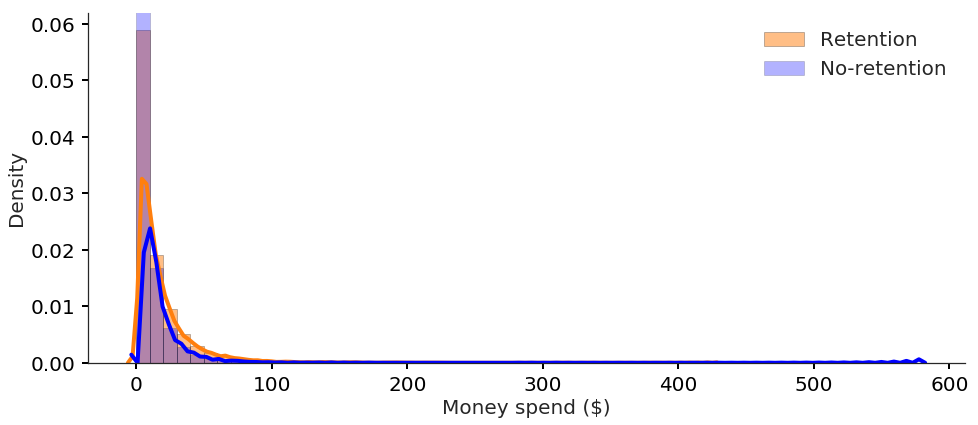

In [106]:
x = dataset1['monetary']
y = dataset0['monetary']
extent = range(0, 100, 10)
bar_plot_compare_retention(x,y, extent,'Money spend ($)', '3.png')

Figure 3.3

/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


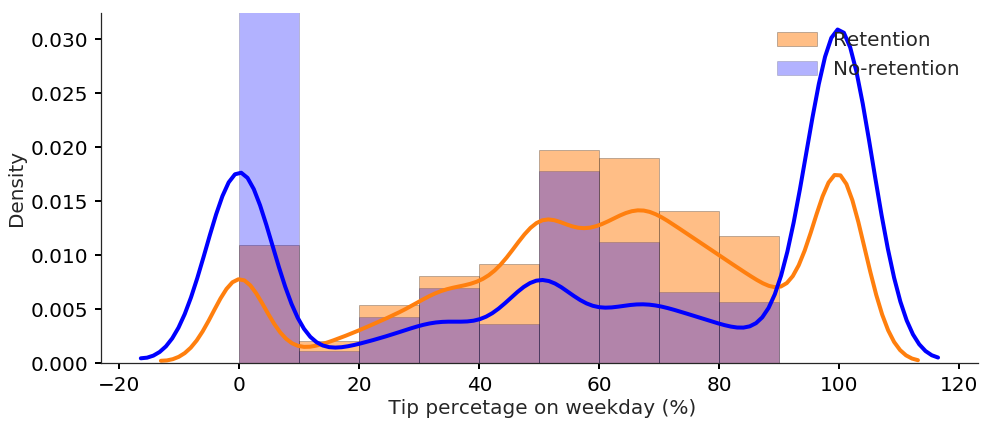

In [107]:
x = dataset1['weekday_pct']
y = dataset0['weekday_pct']
extent = range(0, 100, 10)
bar_plot_compare_retention(x,y, extent,' Tip percetage on weekday (%)', '3.png')


Figure 3.4

/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


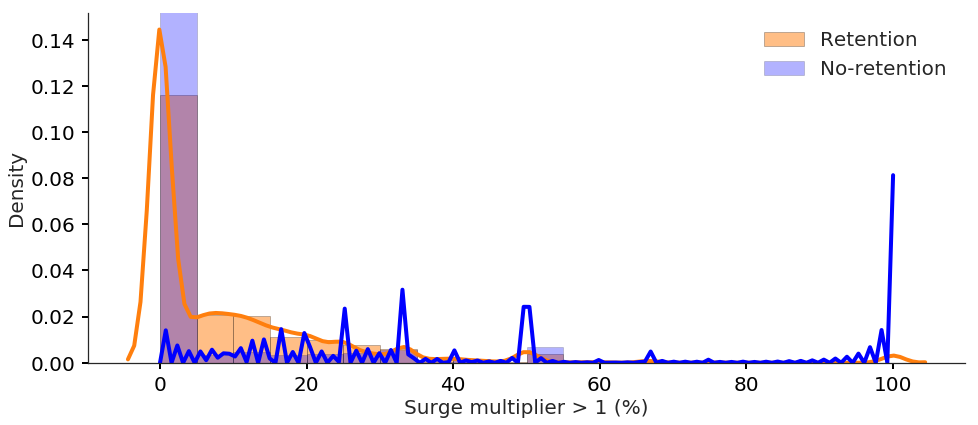

In [108]:
x = dataset1['surge_pct']
y = dataset0['surge_pct']
extent = range(0, 100, 5)
bar_plot_compare_retention(x,y, extent,'Surge multiplier > 1 (%)', '3.png')

Figure 3.5

/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


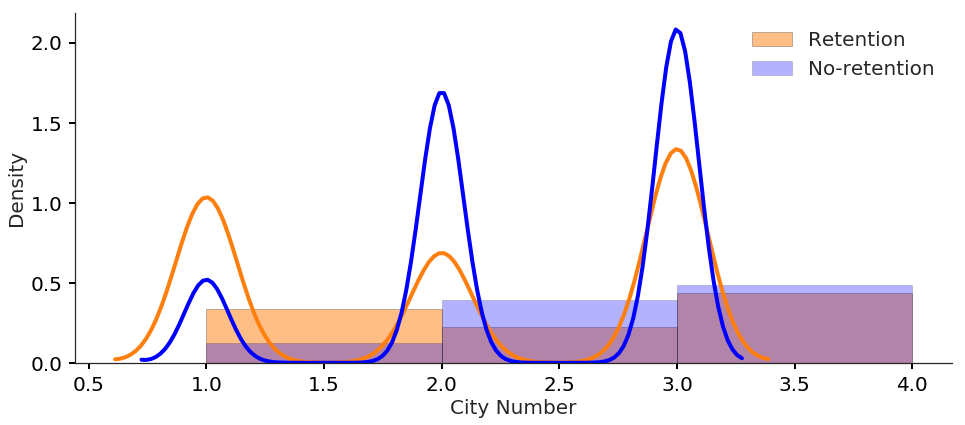

In [109]:
x = dataset1['city']
y = dataset0['city']
extent = range(1, 5, 1)
bar_plot_compare_retention(x,y, extent,'City Number', '3.png')

Figure 3.6

In [110]:
Feature_columns = 'city monetary	 avg_rating_by_driver 	avg_rating_of_driver 	surge_pct 	trips_in_first_30_days 	ultimate_black_user \
weekday_pct'.split()
X = data_challenge[Feature_columns]
Y = data_challenge['retain']

In [111]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [112]:
def confusion(predictions, actuals):
    actuals=actuals.values[:,0] if isinstance(actuals,pd.DataFrame) else actuals
    
    true_pos= (predictions==1) & (actuals==1)
    true_pos.sum()
    true_neg= (predictions==0) & (actuals==0)
    true_neg.sum()
    false_pos= (predictions==1) & (actuals==0)
    false_pos.sum()
    false_neg= (predictions==0) & (actuals==1)
    false_neg.sum()
    
    prec=true_pos.sum()/(true_pos.sum()+false_pos.sum())
    accur=(true_pos.sum()+true_neg.sum())/(true_pos.sum()+false_pos.sum()+ \
                                           true_neg.sum()+ false_neg.sum())
    recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
    F1=2*(prec*recall/(prec+recall))
 
    return(true_pos.sum(), false_pos.sum(),false_neg.sum(),true_neg.sum(), accur,recall, prec, F1)

In [113]:
train_ab = np.array((confusion(y_pred_train, y_train.reshape((1, 40000)))))

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [114]:
test_ab = np.array((confusion(y_pred, y_test.reshape((1, 10000)))))

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [115]:
from sklearn.linear_model import LogisticRegression
# Create the classifier: logreg
logreg = LogisticRegression(C=0.1)

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred =logreg.predict(X_test)
y_pred_train =logreg.predict(X_train)


In [116]:
train_lg = np.array((confusion(y_pred_train, y_train.reshape((1, 40000)))))

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [117]:
test_lg = np.array((confusion(y_pred, y_test.reshape((1, 10000)))))

/home/titli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [118]:
# join array
m1 = [*train_ab[4:8] , *test_ab[4:8]]
m2 = [*train_lg[4:8] , *test_lg[4:8]]
merge = (np.asarray([*m1, *m2])).reshape(2,8)

In [119]:
# Creating metrics table
arrays = [np.hstack([ ['Training Set']*4, ['Test Set']*4]), ['Accuracy', 'Precision', 'F1-score', 'Recall']*2]
columns = pd.MultiIndex.from_arrays(arrays, names=['Model', ''])
df = pd.DataFrame(merge,columns=columns,index=('AdaBoost','Logistic Regression'))

#np.zeros((2,8))
print(df)

Model               Training Set                               Test Set  \
                        Accuracy Precision  F1-score    Recall Accuracy   
AdaBoost                0.771575  0.618222  0.732808  0.670656   0.7612   
Logistic Regression     0.688975  0.349415  0.664812  0.458074   0.6958   

Model                                              
                    Precision  F1-score    Recall  
AdaBoost             0.607029  0.714286  0.656304  
Logistic Regression  0.368477  0.673807  0.476420  


Table 3.1

### Part-3
1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few 
sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
<br>
**A:** 37.61 % of the users retained. A series of vizualizations are used based on user that were retained to user with no retention. The results from the vizualization are as follows:
<br>
(a)Based on money value (Figure 3.3) the most of the retained riders paid atleast 10 dollars less than the riders with no reteintion. 
<br>
(b)Based on tip percentage on weekday (Figure 3.4) an alomost similar trend is noticed for riders with retaintin and no retention. In fact it seems that of retained riders did pay tip of 40-80% which is more that density of population of no-retention drivers.
<br>
(c) Based on surge multilplier (Figure 3.5) riders with no retention has paid surge multiplier > 1 more times than riders with retention. Some of the riders with retention has even paid surge multiplier > 1  100% of their trips. Where as 90% of the riders who retained paid surge multiplier > 1 less than 30% of their trips.
<br>
(d) Based on Figure 3.6 most of the riders registerd are from king's Landing. In king's landing and Winterfell more riders did not retain. Where as in Asphor the number of riders registered is less but most of them retained.
<br>
<br>
2.Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
<br>
**A:** Two methods of predictive modelling are used (a) Adaboost and (b)logistic regression. Adaboost classifier builds strong classifier by combing multiple poorly performing classifier. Table 3.1 gives detailed explanation on the accuracy and prediction on train and test set. The test-train set is divided into 80-20 split. Adaboost performed well than logistic regression. 77% accuracy on both training and test set. There is no overfitting. Logistic regression has an 69% acuuracy on training and test set. Also no overfitting.
<br>
<br>
3.Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention 
(again, a few sentences will suffice)
<br>
**A:** Long-term rider retention is affected by factors like the type city, percentage of time surge multiplier > 1 paid by riders, how much money the riders are spending. The Adaboost classifier prodicted the users with retention and no retention with 77% accuracy. Ultimate might have to consider facts that are affecting Asphor to have more retention than king's Landing. Also if the riders are not paying too much surge they are most likely to retain.
